In [5]:
import numpy as np
import numpy.random as rnd
import scipy.stats as stats
import matplotlib.pyplot as plt

Estimating the mean of a function. Not trivial?
How to do efficiently?

When there is high variance in the function ...?

$$
\begin{align}
m^* = m + a(t - \tau) \\
a^* = -\frac{Cov(m, t)}{Var(t)} \\
\end{align}
$$

Estimating the mean in an incremental fashion

$$
\begin{align}
\mu_t &= \sum_{i=0}^t x_i \tag{average}\\
\mu_{t+1} &= \mu_t + a(\mu_t - x_t) \\
a &= \frac{1}{t+1} \\
\end{align}
$$

$$
\begin{align}
\mu_t &= \sum_{i=0}^t \gamma^ix_i \tag{exponential moving average}\\
\mu_{t+1} &= \mu_t + a(\mu_t - x_t) \\
a &= \beta \tag{some constant value} \\
\end{align}
$$

what about other relationships? what would they mean? exp, log, sin,...?

$$
\begin{align}
a &=
\end{align}
$$


TODO want some images for intuition.
- correction of a fn
- effect of variance on accuracy

What if we care about more than just the mean?

<ul>
  <li>What complicates estimating the variance of a function? Higher order moments? (can we recursively use control variates for each higher order!?)</li>
  <li>What if we want to estimate the entire distribution? Is there a way to use</li>
  <li>what about other p norms? $\mu = \mathop{\text{argmin}}_y \sum_{i=0}^t \parallel x_i-y\parallel_2$.</li>
</ul>

- Touch on A2C?
- What about control variates for gradient estimation? (could use synthetic grads?)
- Control variates for n-armed bandits.


In [6]:
N = 1000
gaussian = lambda mean, stddev, N: rnd.standard_normal(N)*stddev + mean

In [7]:
def estimate_mean(x):
    # cumlative mean estimates
    return [np.mean(x[:i]) for i in range(1,N)]  # could be done recursively.

m_1 = estimate_mean(gaussian(0, 1, N))
m_3 = estimate_mean(gaussian(0, 4, N))
m_5 = estimate_mean(gaussian(0, 8, N))

Text(0,0.5,'Estimated mean')

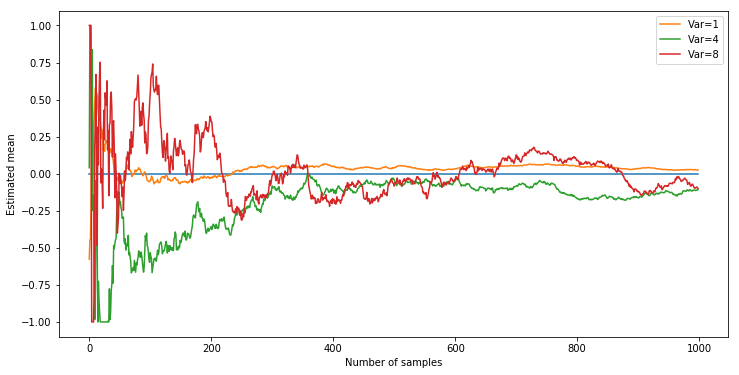

In [8]:
plt.figure(figsize=(12,6))
plt.plot(np.zeros(len(m_1)))
plt.plot(np.clip(m_1, -1, 1), label='Var=1')
plt.plot(np.clip(m_3, -1, 1), label='Var=4')
plt.plot(np.clip(m_5, -1, 1), label='Var=8')
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Estimated mean')

Ok, so the mean tends to wander around more if there is more variance. So there must be a bound on the accuracy of the mean, given the variance!? 

$$
\epsilon = \mathbb E[x] - \frac{1}{N}\sum_{i=0}^N x \\
\epsilon = \mathcal O(\sigma)
$$

__NOTE__ Still doesnt tell me why high variance matters... It matterns in the context of optimisation because !??!??

What about;
- different distributions? With asymmetric variance, or long tails?
- higher order moments? (variance, skewness,kurtosis). How does the accuracy of an estimate  of variance depend on skewness?

## Control variates


* https://en.wikipedia.org/wiki/Control_variates
* Control Variates By Christiane Lemieux
* https://www2.math.su.se/matstat/reports/serieb/2007/rep10/report.pdf

> In order to reduce the variance $\sigma^2/n$, two approaches are possible. One is to replace the function $\hat h$ by an alternative function $\hat h$ such that $E( h(X))= μ$ but with $Var( h(X))
< σ^2$. This is the idea behind variance reduction techniques. The second approach consists of replacing the iid sampling scheme at the basis of Monte Carlo simulation by quasi-random sampling (see Random Number Generation and Quasi-Monte Carlo), thereby changing the $1/n$ convergence rate of the variance by possibly something as fast as $\mathcal O((log n)^d/n^3 )$, where d is the dimension of the problem. The method of control variates that we are
about to describe falls in the first category of approaches.

?

> First, we must find a random variable W such that μ w = E(W ) can be computed analytically and also such that Y and W are dependent.

?

> To see why this is useful, consider the case where
Y and W are positively correlated. Then if the naive estimator μ ̂ w,n is lower than its expected value of μ w ,
it suggests that probably μ ̂ n is also lower than the unknown μ, and therefore, a positive correction should
be added to it to reduce its error.

?

> As the goal of this technique is to get an estimator with smaller
variance than the naive Monte Carlo estimator, it makes sense to try to choose β so as to minimize the
variance of μ ̂ cv,n .

__Q__; Is tha really true? Sure we dont want to pick b to minimise the variance of the target fn?



__Q__; What about memory limited settings. When you cannot keep thousands of past 

In [9]:
n_samples = 2000

def F(x):
    return 1/(1+x)

samples = rnd.random(n_samples)
f = F(samples)

print(np.mean(f), np.var(f))

0.6886103207659812 0.019151180735422442


In [10]:
mean_g = 3/2  

def G(x):  
    # why this fn!?  
    # can different fns give better results?
    # why sorts of fns give better results? and why?
    # what if g is biased? biased to what alex... 
    # the whole point was that we chose a G that wasnt...
    return x + 1

g = G(samples)

c = -np.var(f)/np.cov(f,g)[0,1]  # want to derive this myself

output = f + c*(g - mean_g)  
# does this introduce any bias?
# seems like it should, why doesnt it?
# could try prove it? E[f] = E[f + c(g-mu_g)]

print('Mean: {}'.format(np.mean(output)), 
      '\nVariance: {}'.format(np.var(output)), 
      '\n{:.3f} times variance reduction'.format(np.var(f)/np.var(output))
     )

Mean: 0.693074218700692 
Variance: 0.0006407896090548606 
29.887 times variance reduction


In [11]:
# ok, lets see f I am starting to understand.
# so if the control fn is more similar to
# the target fn then we should get more variance reduction?

mean_h = 0.4054  # found using samples
def H(x):  
    return  1/(x + 2)
h = H(samples)

c = -np.var(f)/np.cov(f,h)[0,1] 
output = f + c*(h - mean_h)  

print('Mean: {}'.format(np.mean(output)), 
      '\nVariance: {}'.format(np.var(output)), 
      '\n{:.3f} times variance reduction'.format(np.var(f)/np.var(output))
     )

Mean: 0.6929086170825259 
Variance: 0.00010953684001990143 
174.838 times variance reduction


Multiple control varaties. 

In the example above, we are kinda saying, assume F is similar to G. If our sample is from G is a distance from its mean then the sample is also a similar distance from F's mean.
When F isnt like G, this will be wrong, but not a big deal as that is what we used their correlation for. 

_What if we made $c$ a fn of the position of the sample? c(x)? Rather than a single linear approximation of the similarity between F and G we could tune it locally. 

Generalising this to many controls. Constraining F to be within G_i. If sample is greater than G_1, and G_2 but less than G_3 then assume the sample was slightly too high and correct it. (but what if we had extra/partial info that G_3 was very similar to F? -- this is what c is trying to correct for?!)

In [81]:

def skew_norm_pdf(x,mu=0,std=1,a=0):
    # https://stackoverflow.com/questions/36200913/generate-n-random-numbers-from-a-skew-normal-distribution-using-numpy
    t = (x-mu) / std
    return 2.0 * std * stats.norm.pdf(t) * stats.norm.cdf(a*t)

def estimate_variance(x):
    return [np.var(x[:i]) for i in range(1,N)]  # could be done recursively.

In [82]:
skews = [0, 1, 12]

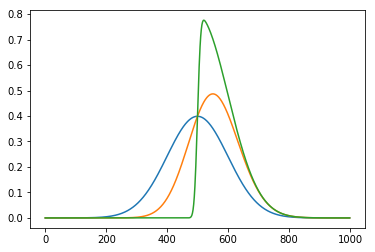

In [83]:
distributions = [skew_norm_pdf(x, std=1, a=skew) for skew in skews]

for dist in distributions:
    plt.plot(dist)

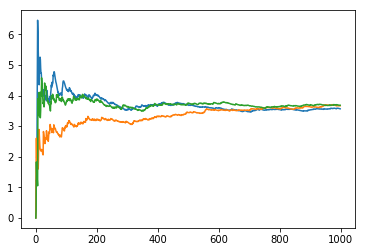

In [84]:
for dist in distributions:
    samples = rnd.choice(x, 10000, p=d_0/np.sum(d_0))
    
    v = estimate_variance(samples)
    plt.plot(v)